In [1]:
import torch 
from torch import nn 
from d2l import torch as d2l 


n_train = 50 
x_train, _ = torch.sort(torch.rand(n_train) * 5)

def f(x):
    return 2 * torch.sin(x) + x**0.8 

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))
x_test = torch.arange(0, 5, 0.1)
y_truth = f(x_test)
n_test = len(x_test)


def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'], 
        xlim=[0,5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)



class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))
        
    def forward(self, queries, keys, values):
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(-((queries - keys) * self.w)**2 / 2, dim=1)
        return torch.bmm(self.attention_weights.unsqueeze(1), values.unsqueeze(-1).reshape(-1))
    

X_title = x_train.repeat((n_train, 1))
Y_title = y_train.repeat((n_train, 1))

keys = X_title[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
values = Y_title[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))


net = NWKernelRegression() 
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(nn.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train) / 2 
    l.sum().backward()
    trainer.step() 
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

keys = x_train.repeat((n_test, 1))
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

d2l.show_heatmaps(
    net.attention_weights.unsqueeze(0).unsqueeze(0),
    xlabel='Sorted training inputs', ylabel='Sorted testing inputs')





AttributeError: module 'torch.nn' has no attribute 'parameters'

In [26]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

tensor([[[ 4.5000]],

        [[14.5000]]])

In [33]:
x_train

tensor([0.1690, 0.2195, 0.3575, 0.4142, 0.6016, 0.6863, 0.7417, 0.7843, 0.8340,
        0.9749, 0.9812, 1.0675, 1.1250, 1.1582, 1.2525, 1.3347, 1.6012, 1.6230,
        1.8217, 1.8356, 1.8359, 1.8629, 1.8839, 2.1353, 2.1879, 2.3458, 2.4020,
        2.5595, 2.6031, 2.7163, 2.9126, 2.9953, 3.0922, 3.1624, 3.3540, 3.4187,
        3.6890, 3.8680, 4.1850, 4.2321, 4.2466, 4.3268, 4.4133, 4.5107, 4.7377,
        4.8028, 4.9010, 4.9323, 4.9792, 4.9892])

In [34]:
y_train

tensor([0.4774, 0.1786, 1.3095, 1.0554, 2.3875, 2.0484, 2.9174, 3.2832, 2.3232,
        2.9837, 2.5692, 2.4283, 2.9103, 2.6482, 2.9121, 1.9733, 3.4174, 3.6979,
        2.3236, 3.1579, 3.1473, 3.7490, 4.0241, 3.4466, 3.1145, 3.2757, 2.7144,
        2.9917, 2.7387, 2.5253, 2.7147, 2.4271, 3.6208, 2.8302, 1.8143, 2.8750,
        2.0728, 1.6290, 1.8749, 0.3182, 1.3701, 0.9017, 0.1785, 1.0476, 0.5610,
        2.5207, 2.6217, 2.0639, 2.1975, 1.6971])

In [35]:
X_tile = x_train.repeat((n_train, 1))

In [37]:
X_tile.shape 

torch.Size([50, 50])

In [38]:
Y_tile = y_train.repeat((n_train, 1))

In [39]:
Y_tile.shape
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

torch.Size([50, 50])

In [46]:
X_tile[(1 - torch.eye(n_train)).type(torch.bool)].shape 

torch.Size([2450])

In [47]:
X_tile 

tensor([[0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892],
        ...,
        [0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9323, 4.9792, 4.9892]])

In [48]:
Y_tile

tensor([[0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971],
        [0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971],
        [0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971],
        ...,
        [0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971],
        [0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971],
        [0.4774, 0.1786, 1.3095,  ..., 2.0639, 2.1975, 1.6971]])

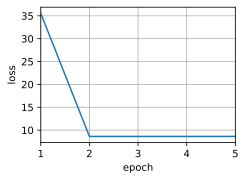

In [6]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))

    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为(查询个数，“键－值”对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(
            -((queries - keys) * self.w)**2 / 2, dim=1)
        # values的形状为(查询个数，“键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),
                         values.unsqueeze(-1)).reshape(-1)

# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))
# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))
# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

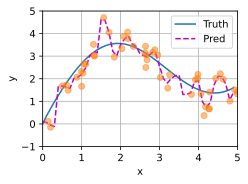

In [7]:
keys = x_train.repeat((n_test, 1))
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

In [41]:
keys

tensor([[0.2195, 0.3575, 0.4142,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.3575, 0.4142,  ..., 4.9323, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.4142,  ..., 4.9323, 4.9792, 4.9892],
        ...,
        [0.1690, 0.2195, 0.3575,  ..., 4.9010, 4.9792, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9010, 4.9323, 4.9892],
        [0.1690, 0.2195, 0.3575,  ..., 4.9010, 4.9323, 4.9792]])